In [16]:
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

from climate_indices import indices,compute
from climate_indices.indices import Distribution

import PCA_functions as pf

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

In [17]:
def phase_averaging(data,freq = 12):
    N = len(data)
    temp = data
    result = np.zeros(N)
    averages = np.zeros(freq)
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        averages[j] = temp[Idx].mean()
        result[Idx] = (temp[Idx] - temp[Idx].mean())/temp[Idx].std()
    return(result, averages)

In [18]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [19]:
n_components = 5
level = 12
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 

In [140]:
data = np.load('data.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')

result = []
index = []
lat_list = []
lon_list =[]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        #if not np.isnan(data[i,j,-1]):
        if not data[i,j,-1]<0:    
            result.append(data[i,j,:])
            index.append((lon[i],lat[j]))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

In [10]:
data = np.load('spi1_half_48_16.npy')
lat = np.load('lat_half.npy')
lon = np.load('lon_half.npy')

result = []
index = []
lat_list = []
lon_list =[]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if not np.isnan(data[i,j,-1]):
        #if not data[i,j,-1]<0:    
            result.append(data[i,j,11:])
            index.append((lon[i],lat[j]))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

In [24]:
spi = np.load('spi1_half_48_16.npy')

In [238]:
s = spi[:,0]

In [28]:
index = s<-1

In [174]:
def drought_prob(spi, states):
    result = np.zeros(len(set(states)))
    for state in set(states):
        Idx = (states == state)
        sum_state = np.count_nonzero(Idx)
        n = np.count_nonzero(spi[Idx]<-1)
        result[state] = n/sum_state
    return(result/sum(result))

In [220]:
r = drought_prob(s, clustering.labels_)

In [221]:
m = np.matrix(m)

In [67]:
r1  = np.matmul(r,m)
for i in range(1000):
    r1  = np.matmul(m,r1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 12)

In [234]:
r = np.matmul(r,m)

In [235]:
r

matrix([[0.01709659, 0.00245206, 0.01836244, 0.08199322, 0.00980111,
         0.04896361, 0.02813777, 0.02447537, 0.02213867, 0.0122436 ,
         0.01594027, 0.00980854, 0.05141746, 0.00489478, 0.19354864,
         0.04539222, 0.09936253, 0.13600135, 0.00981356, 0.00739426,
         0.00121729, 0.00245516, 0.01467711, 0.04178527, 0.00984396,
         0.00735166, 0.02208276, 0.00122524, 0.05646374, 0.00365981]])

In [97]:
sum(r)

1.216677856288704

In [34]:
Idx = (clustering.labels_ == 0)

In [38]:
np.count_nonzero(s[Idx]<-1)

29

In [40]:
np.count_nonzero(Idx)

209

In [48]:
29/209

0.13875598086124402

In [176]:
d = Data('GPCC_half.nc','precip',temporal_limits, missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [177]:
result = pf.deseasonalize(np.array(result))
#result = np.array(result)
#data = pd.DataFrame(result)

In [178]:
result = np.array(result)

In [11]:
#just for spi
result = np.nan_to_num(result)

# TSNE

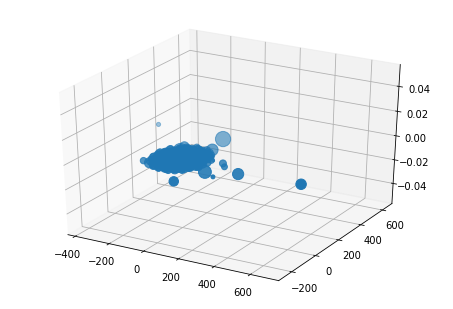

In [53]:
X_embedded = TSNE(n_components=3,perplexity=80.0).fit_transform(result)
clustering = AgglomerativeClustering(n_clusters=n_components).fit(X_embedded)

fig = plt.figure()
ax = Axes3D(fig)

vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]
vis_z = X_embedded[:, 2]
plt.scatter(vis_x, vis_y, vis_z)
#plt.colorbar(ticks=range(10))
#plt.clim(-0.5, 9.5)
plt.show()

# Clustering

In [54]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(result)
    Sum_of_squared_distances.append(km.inertia_)

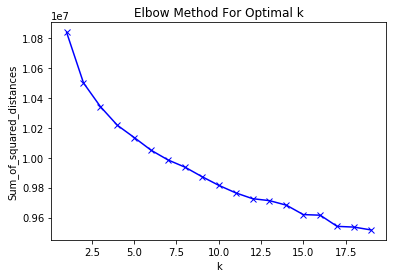

In [55]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
dbscan = DBSCAN(eps=0.3, min_samples = 200)
clusters = dbscan.fit_predict(np.transpose(result))

In [66]:
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [18]:
#temp = np.array(result)
#agg = AgglomerativeClustering(n_clusters=10, affinity='precomputed',linkage = 'average')
#clustering = agg.fit_predict(np.corrcoef(np.transpose(temp)))  # Returns class labels.

In [182]:
#temp = pf.deseasonalize(np.transpose(result))
temp = np.array(result)
#temp = pf.deseasonalize(result)
clustering = AgglomerativeClustering(n_clusters=30).fit(temp)

matrix([[0.01709659, 0.00245206, 0.01836244, 0.08199322, 0.00980111,
         0.04896361, 0.02813777, 0.02447537, 0.02213867, 0.0122436 ,
         0.01594027, 0.00980854, 0.05141746, 0.00489478, 0.19354864,
         0.04539222, 0.09936253, 0.13600135, 0.00981356, 0.00739426,
         0.00121729, 0.00245516, 0.01467711, 0.04178527, 0.00984396,
         0.00735166, 0.02208276, 0.00122524, 0.05646374, 0.00365981]])

In [249]:
19*12

228

In [239]:
np.where(s<-1)

(array([235, 237, 238, 246, 292, 315, 335, 339, 340, 350, 362, 388, 389,
        395, 399, 404, 406, 418, 433, 434, 435, 436, 437, 439, 441, 442,
        443, 454, 462, 467, 469, 479, 480, 493, 494, 507, 519, 520, 521,
        522, 530, 533, 534, 537, 538, 539, 540, 542, 550, 561, 570, 571,
        613, 614, 624, 628, 632, 633, 635, 636, 637, 638, 641, 642, 644,
        645, 646, 648, 650, 655, 657, 665, 680, 682, 693, 702, 710, 732,
        738, 749, 751, 760, 787, 791, 792, 793, 794, 795, 796, 797, 798,
        799, 800, 812]),)

In [257]:
idx = np.arange(0,817,12)

In [273]:
clustering.labels_[799]

28

In [259]:
idx

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300,
       312, 324, 336, 348, 360, 372, 384, 396, 408, 420, 432, 444, 456,
       468, 480, 492, 504, 516, 528, 540, 552, 564, 576, 588, 600, 612,
       624, 636, 648, 660, 672, 684, 696, 708, 720, 732, 744, 756, 768,
       780, 792, 804, 816])

In [258]:
clustering.labels_[idx]

array([14, 17, 11, 17,  5, 12, 17, 16, 16,  5,  7, 10, 17, 10, 14, 23, 17,
        9, 17, 14, 17, 25, 23, 14,  7, 17, 18, 12,  2, 16, 12, 29, 17,  3,
       14, 28, 17, 17, 14, 17, 28, 14,  5, 15,  2, 28, 17, 17, 16, 12, 19,
        6,  4, 14, 16, 16,  8,  3,  0, 14,  6,  5,  6, 15, 14, 14, 16, 14,
       23])

In [262]:
r

matrix([[0.01709659, 0.00245206, 0.01836244, 0.08199322, 0.00980111,
         0.04896361, 0.02813777, 0.02447537, 0.02213867, 0.0122436 ,
         0.01594027, 0.00980854, 0.05141746, 0.00489478, 0.19354864,
         0.04539222, 0.09936253, 0.13600135, 0.00981356, 0.00739426,
         0.00121729, 0.00245516, 0.01467711, 0.04178527, 0.00984396,
         0.00735166, 0.02208276, 0.00122524, 0.05646374, 0.00365981]])

In [30]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M



In [185]:
m = transition_matrix(clustering.labels_)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.14 0.00 0.07 0.07 0.00 0.00 0.00 0.07 0.00 0.07 0.00 0.00 0.00 0.00 0.21 0.00 0.14 0.21 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.07 0.20 0.07 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.20 0.07 0.07 0.20 0.00 0.00 0.00 0.00 0.00 0.07 0.00 0.00 0.00 0.00 0.00 0.00
0.01 0.00 0.06 0.12 0.00 0.06 0.01 0.01 0.00 0.00 0.03 0.00 0.06 0.00 0.15 0.04 0.10 0.18 0.01 0.01 0.00 0.00 0.01 0.03 0.01 0.00 0.01 0.00 0.04 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.00 0.12 0.00 0.00 0.25 0.00 0.00 0.00 0.25 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.12 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.03 0.07 0.00 0.07 0.05 0.00 0.05 0.00 0.03 0.00 0.07 0.03 0.15 0.05 0.03 0.10 0.03 0.03 0.00 0.00 0.03 0.07 0.00 0.00 0.03 0.00 0.10 0.00
0.00 0.00 0.00 0.13 0.00 0.04 0.13 0.00 0.00 0.00 0.00 0.04 0.04 0.00 0.09 0.04 0.22 0.09 0.00 0.00 

In [64]:
m

[[0.30288461538461536,
  0.0,
  0.0673076923076923,
  0.014423076923076924,
  0.04326923076923077,
  0.3317307692307692,
  0.14423076923076922,
  0.014423076923076924,
  0.004807692307692308,
  0.009615384615384616,
  0.057692307692307696,
  0.009615384615384616],
 [0.15384615384615385,
  0.15384615384615385,
  0.15384615384615385,
  0.0,
  0.07692307692307693,
  0.07692307692307693,
  0.23076923076923078,
  0.0,
  0.07692307692307693,
  0.0,
  0.07692307692307693,
  0.0],
 [0.189873417721519,
  0.0,
  0.13924050632911392,
  0.0759493670886076,
  0.0379746835443038,
  0.26582278481012656,
  0.16455696202531644,
  0.02531645569620253,
  0.012658227848101266,
  0.012658227848101266,
  0.05063291139240506,
  0.02531645569620253],
 [0.4117647058823529,
  0.058823529411764705,
  0.17647058823529413,
  0.0,
  0.058823529411764705,
  0.11764705882352941,
  0.11764705882352941,
  0.0,
  0.0,
  0.0,
  0.058823529411764705,
  0.0],
 [0.32142857142857145,
  0.03571428571428571,
  0.03571428571428

(array([ 31., 115.,  61.,  31., 205., 229.,  15.,  48.,  32.,  50.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

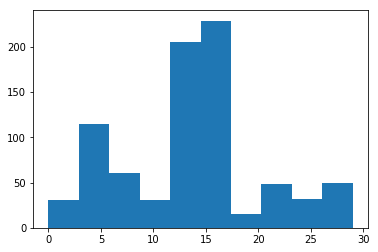

In [183]:
plt.hist(clustering.labels_)

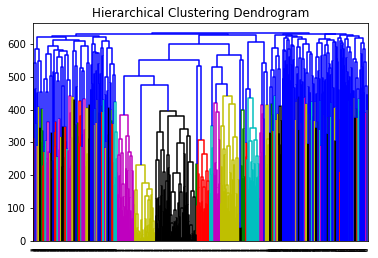

<Figure size 2160x1440 with 0 Axes>

In [23]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.figure(figsize=(30, 20))
plt.show()

In [14]:
#linked = linkage(temp, 'single')

#labelList = range(1, 11)

#plt.figure(figsize=(10, 7))
#dendrogram(linked,
 #           orientation='top',
  #          labels=labelList,
   #         distance_sort='descending',
    #        show_leaf_counts=True)
#plt.show()

In [8]:
df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

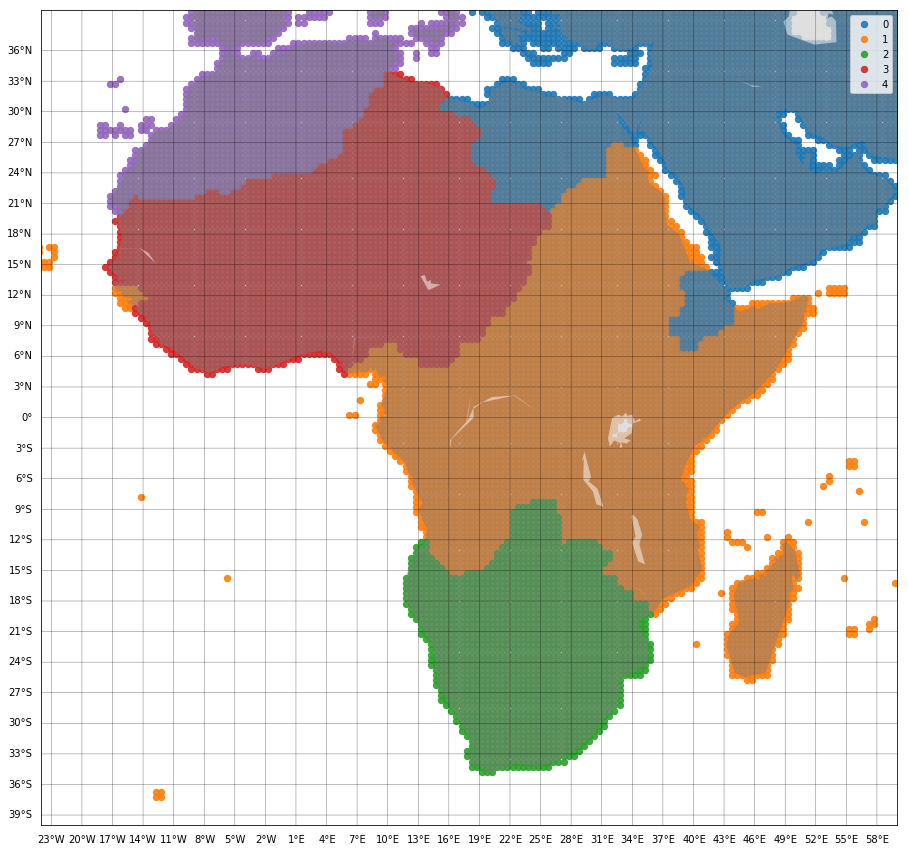

In [9]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)

#colors = pf.random_color_1(n_components)

for i in range(n_components):
    values = df["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=40, label = i)

    
plt.legend()
plt.show()

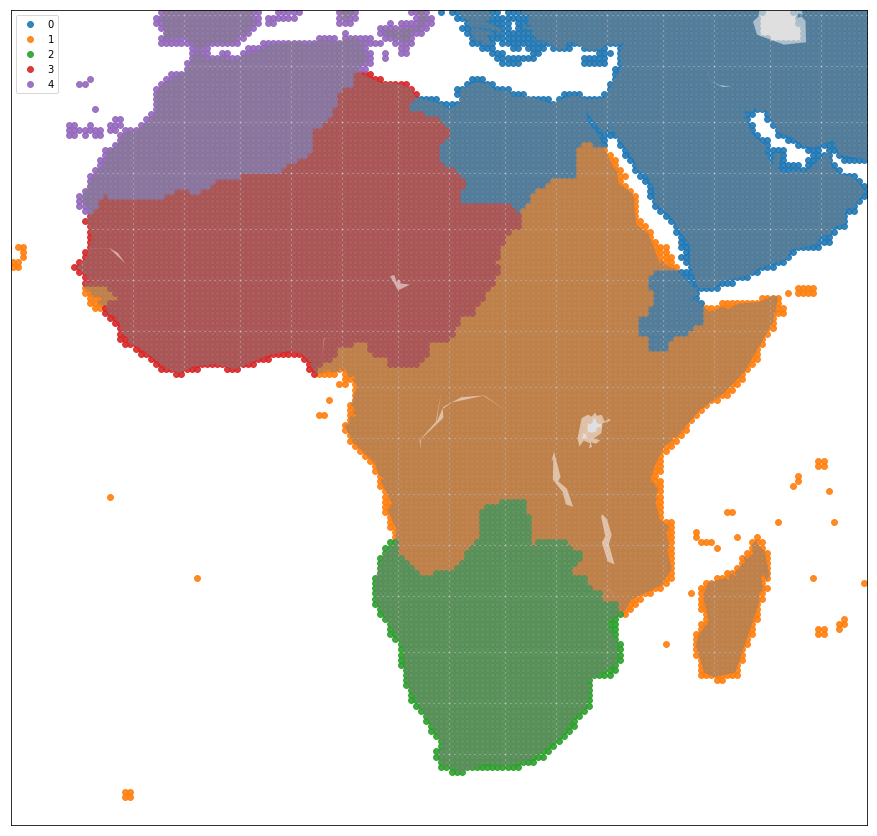

In [57]:
df_list = []
for j in range(n_components):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)

#colors = pf.random_color_1(n_components)

for i in range(n_components):
    values = df["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=35, label = i)

    
plt.legend()
plt.show()

In [34]:
cluster_data = []
for i in range(n_components):
    Idx = np.where((df.clusters == i).values)[0]
    r = result[:,Idx]
    temp = np.sum(r, axis=1)
    temp, avg = phase_averaging(temp)
    cluster_data.append(temp)

In [35]:
df_cluster = pd.DataFrame(np.transpose(np.matrix(cluster_data)))

In [36]:
df_cluster

,0,1,2,3,4
0,-0.523520,0.037394,-0.309739,-0.944455,-0.095529
1,1.205273,0.935328,0.467248,0.212364,-0.102266
2,0.021504,-0.711310,1.742208,-0.721161,-0.887312
3,0.703242,-0.306936,0.513122,3.847539,0.329456
4,-0.122579,-0.088941,-0.432679,-0.389215,0.405208
...,...,...,...,...,...
812,1.866830,0.087802,0.534672,0.503625,0.468255
813,1.880519,0.055746,-1.325213,0.145825,1.564609
814,0.829273,0.358052,-1.463792,-0.381500,-1.013776
815,0.219632,1.133349,-1.437950,-0.717240,-1.583743


In [37]:
var_names = df_cluster.columns

#pca_data = pca_model.transform(data)
#pca_data = result.dot(loading)
pca_data = np.matrix(df_cluster)

dataframe = pp.DataFrame(pca_data,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [38]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 6 link(s):
        (1 0): pval = 0.00000 | val = 0.271
        (4 0): pval = 0.00000 | val = 0.265
        (3 0): pval = 0.00000 | val = 0.244
        (0 -1): pval = 0.00097 | val = 0.116
        (0 -2): pval = 0.00500 | val = 0.099
        (2 -1): pval = 0.00806 | val = 0.093

    Variable 1 has 7 link(s):
        (0 0): pval = 0.00000 | val = 0.271
        (3 0): pval = 0.00000 | val = 0.246
        (1 -1): pval = 0.00000 | val = 0.227
        (4 0): pval = 0.00299 | val = 0.104
        (3 -2): pval = 0.00912 | val = 0.092
        (1 -2): pval = 0.02026 | val = 0.082
        (2 0): pval = 0.03635 | val = 0.074

    Variable 2 has 4 link(s):
        (2 -1): pval = 0.00000 | val = 0.207
        (4 0): pval = 0.00583 | val = 0.097
        (1 -1): pval = 0.01541 | val = -0.085
        (1 0): pval = 0.03635 | val = 0.074

    Variable 3 has 5 link(s):
        (4 0): pval = 0.00000 | val = 0.312
        (1 0): pval = 0.00000 | val 

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbaa3895438>)

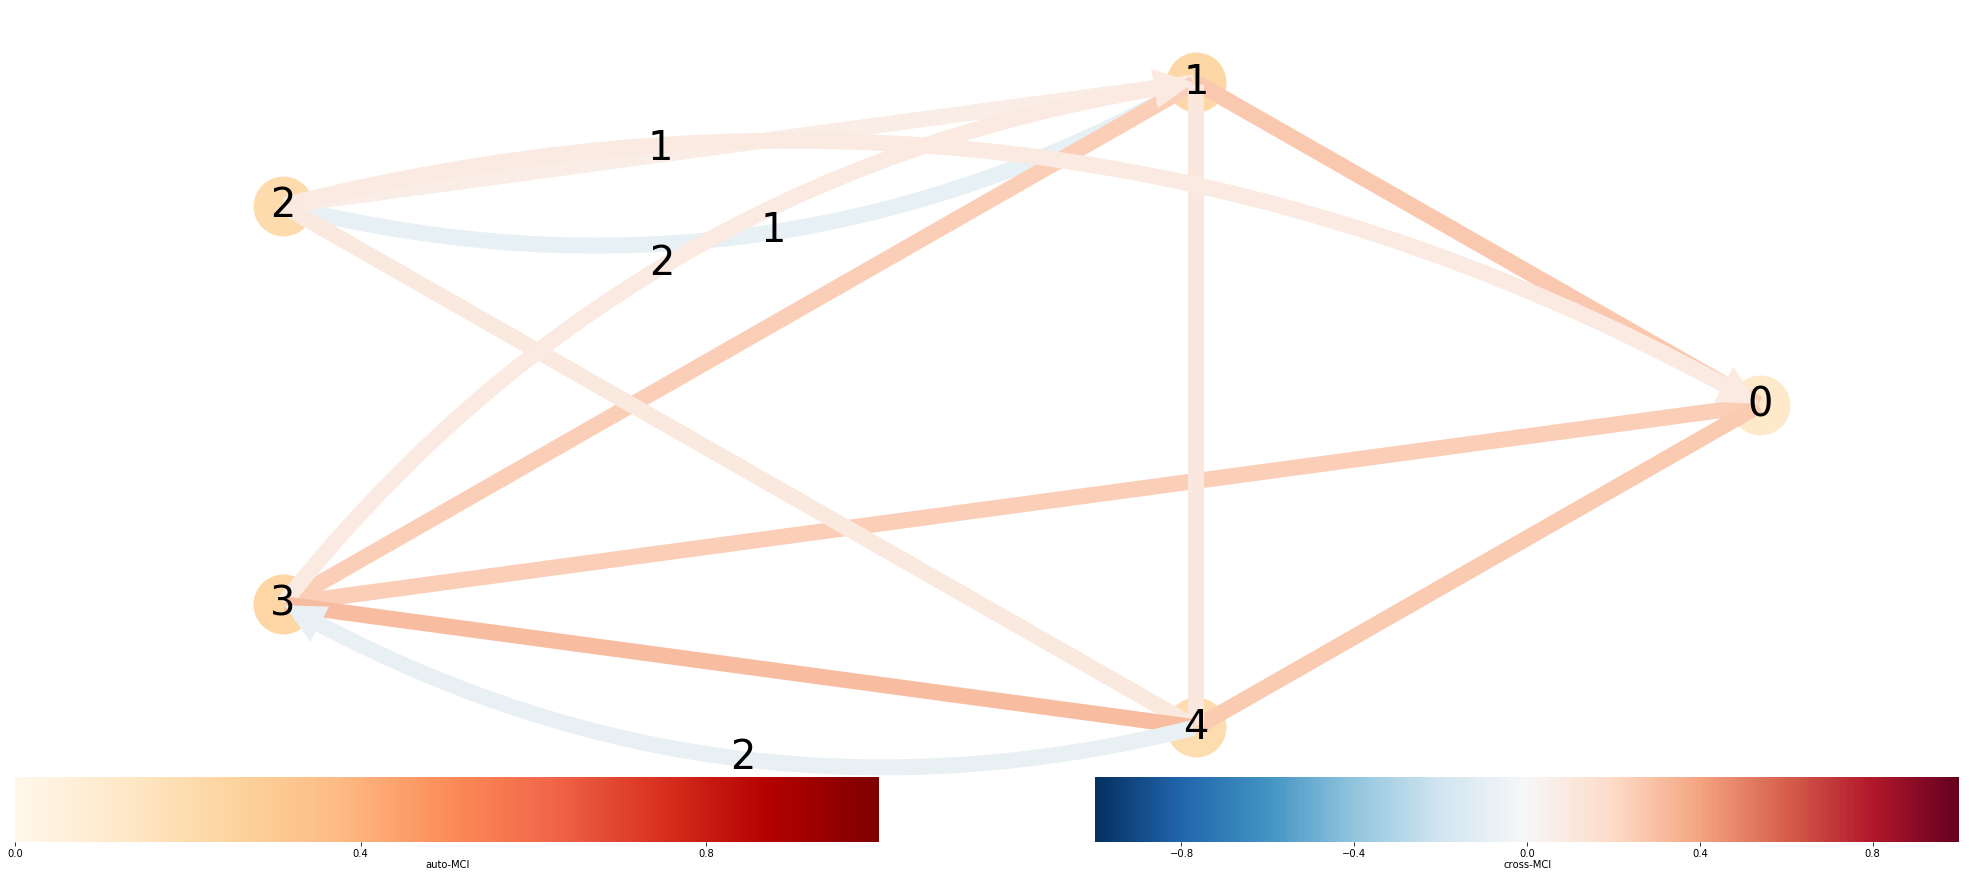

In [39]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

In [40]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable 0 has 4 link(s):
        (1 0): pval = 0.00000 | qval = 0.00000 | val = 0.271
        (4 0): pval = 0.00000 | qval = 0.00000 | val = 0.265
        (3 0): pval = 0.00000 | qval = 0.00000 | val = 0.244
        (0 -1): pval = 0.00097 | qval = 0.00966 | val = 0.116

    Variable 1 has 4 link(s):
        (0 0): pval = 0.00000 | qval = 0.00000 | val = 0.271
        (3 0): pval = 0.00000 | qval = 0.00000 | val = 0.246
        (1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.227
        (4 0): pval = 0.00299 | qval = 0.00299 | val = 0.104

    Variable 2 has 2 link(s):
        (2 -1): pval = 0.00000 | qval = 0.00000 | val = 0.207
        (4 0): pval = 0.00583 | qval = 0.00583 | val = 0.097

    Variable 3 has 4 link(s):
        (4 0): pval = 0.00000 | qval = 0.00000 | val = 0.312
        (1 0): pval = 0.00000 | qval = 0.00000 | val = 0.246
        (0 0): pval = 0.00000 | qval = 0.00000 | val = 0.244
        (3 -1): pval = 0.00000 | qval = 0

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fba9c512b00>)

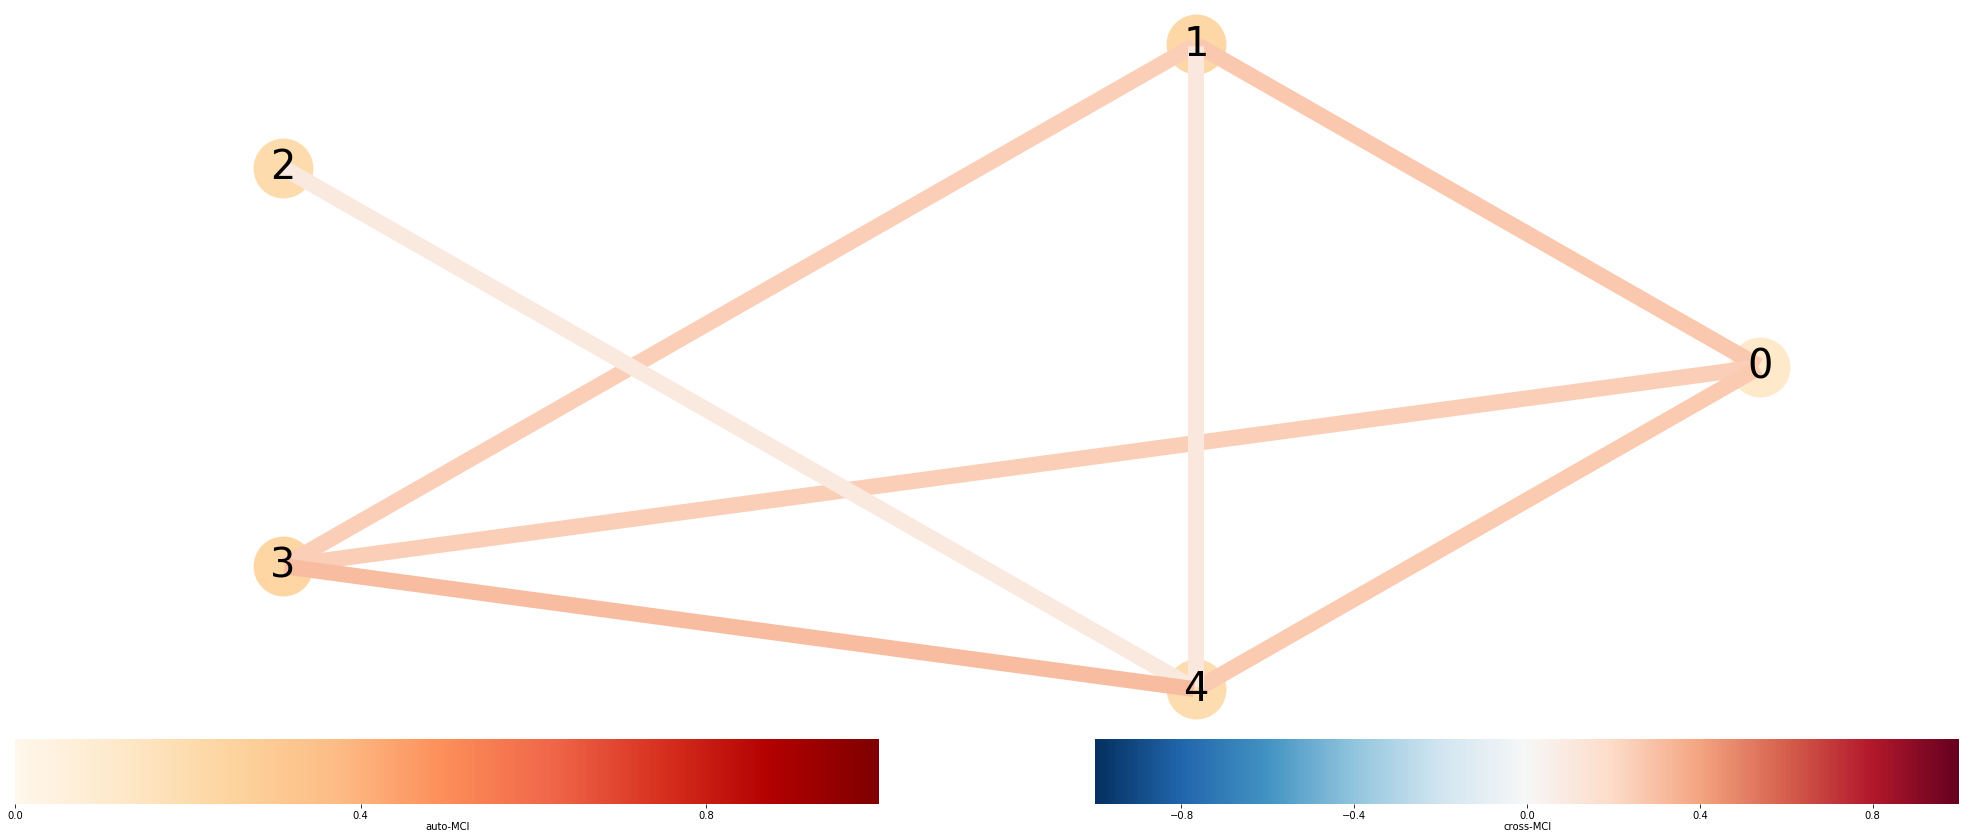

In [41]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

# PCA for each clusters

In [30]:
cluster_data = []
for i in range(n_components):
    Idx = np.where((df.clusters == i).values)[0]
    r = result[:,Idx]
    #r = pf.deseasonalize(np.array(r))
    data = pd.DataFrame(r)
    scale = StandardScaler()
    scaled_data = scale.fit_transform(data)
    pca = PCA(n_components=n_components)
    pca_model = pca.fit(scaled_data)
    pca_data = pca_model.transform(data)
    cluster_data.append(pca_data[:,0])

In [31]:
df_cluster = pd.DataFrame(np.transpose(np.matrix(cluster_data)))

In [13]:
df_cluster

,0,1,2,3,4
0,-10.030480,-3.164867,-3.537926,-13.732739,-3.782937
1,14.368830,5.254917,7.225209,1.862546,-5.077359
2,2.277247,-5.332322,40.910407,-11.139164,-10.663107
3,9.576290,-10.284727,12.827707,86.646064,3.755908
4,-5.271580,-2.758528,-7.271003,-8.987275,1.221646
...,...,...,...,...,...
812,23.135277,0.715071,7.315361,13.237351,8.571062
813,42.114263,6.995926,-26.907889,3.835155,33.112321
814,24.966360,16.744039,-27.652864,-9.728026,-16.221891
815,14.176962,16.941172,-24.253044,-11.444269,-23.477103


In [14]:
pca_model.explained_variance_ratio_

array([0.20965595, 0.10703286, 0.09087968, 0.06047409, 0.04043667])

In [15]:
var_names = df_cluster.columns

#pca_data = pca_model.transform(data)
#pca_data = result.dot(loading)
pca_data = np.matrix(df_cluster)

dataframe = pp.DataFrame(pca_data,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [16]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable 0 has 7 link(s):
        (1 0): pval = 0.00000 | val = 0.333
        (4 0): pval = 0.00000 | val = 0.264
        (3 0): pval = 0.00000 | val = 0.194
        (0 -1): pval = 0.00014 | val = 0.134
        (2 -1): pval = 0.00537 | val = 0.098
        (2 0): pval = 0.01652 | val = 0.084
        (0 -2): pval = 0.04056 | val = 0.072

    Variable 1 has 5 link(s):
        (0 0): pval = 0.00000 | val = 0.333
        (1 -1): pval = 0.00000 | val = 0.288
        (3 0): pval = 0.00048 | val = 0.123
        (4 0): pval = 0.00614 | val = 0.096
        (3 -2): pval = 0.01433 | val = 0.086

    Variable 2 has 4 link(s):
        (2 -1): pval = 0.00000 | val = 0.216
        (1 -1): pval = 0.00800 | val = -0.093
        (4 0): pval = 0.01179 | val = 0.089
        (0 0): pval = 0.01652 | val = 0.084

    Variable 3 has 4 link(s):
        (4 0): pval = 0.00000 | val = 0.305
        (3 -1): pval = 0.00000 | val = 0.239
        (0 0): pval = 0.00000 | val 

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ef2865908>)

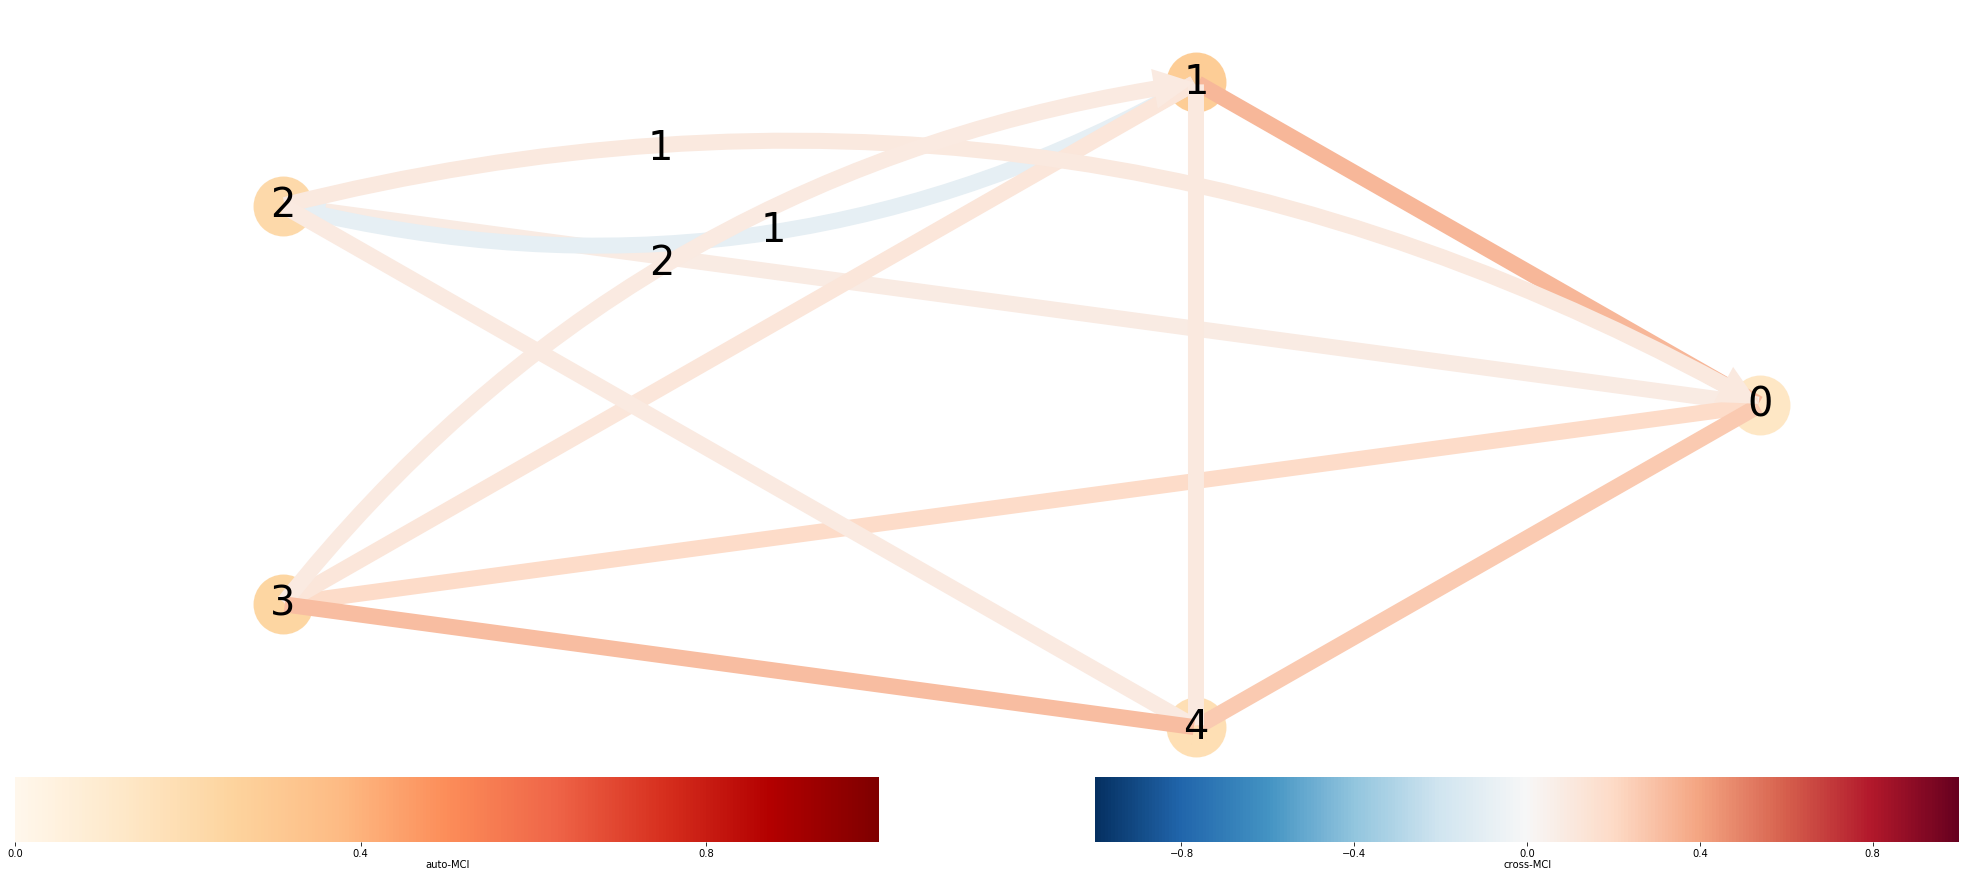

In [17]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

In [18]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable 0 has 4 link(s):
        (1 0): pval = 0.00000 | qval = 0.00000 | val = 0.333
        (4 0): pval = 0.00000 | qval = 0.00000 | val = 0.264
        (3 0): pval = 0.00000 | qval = 0.00000 | val = 0.194
        (0 -1): pval = 0.00014 | qval = 0.00142 | val = 0.134

    Variable 1 has 4 link(s):
        (0 0): pval = 0.00000 | qval = 0.00000 | val = 0.333
        (1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.288
        (3 0): pval = 0.00048 | qval = 0.00048 | val = 0.123
        (4 0): pval = 0.00614 | qval = 0.00614 | val = 0.096

    Variable 2 has 1 link(s):
        (2 -1): pval = 0.00000 | qval = 0.00000 | val = 0.216

    Variable 3 has 4 link(s):
        (4 0): pval = 0.00000 | qval = 0.00000 | val = 0.305
        (3 -1): pval = 0.00000 | qval = 0.00000 | val = 0.239
        (0 0): pval = 0.00000 | qval = 0.00000 | val = 0.194
        (1 0): pval = 0.00048 | qval = 0.00048 | val = 0.123

    Variable 4 has 4 link(s):
        (

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ef27af898>)

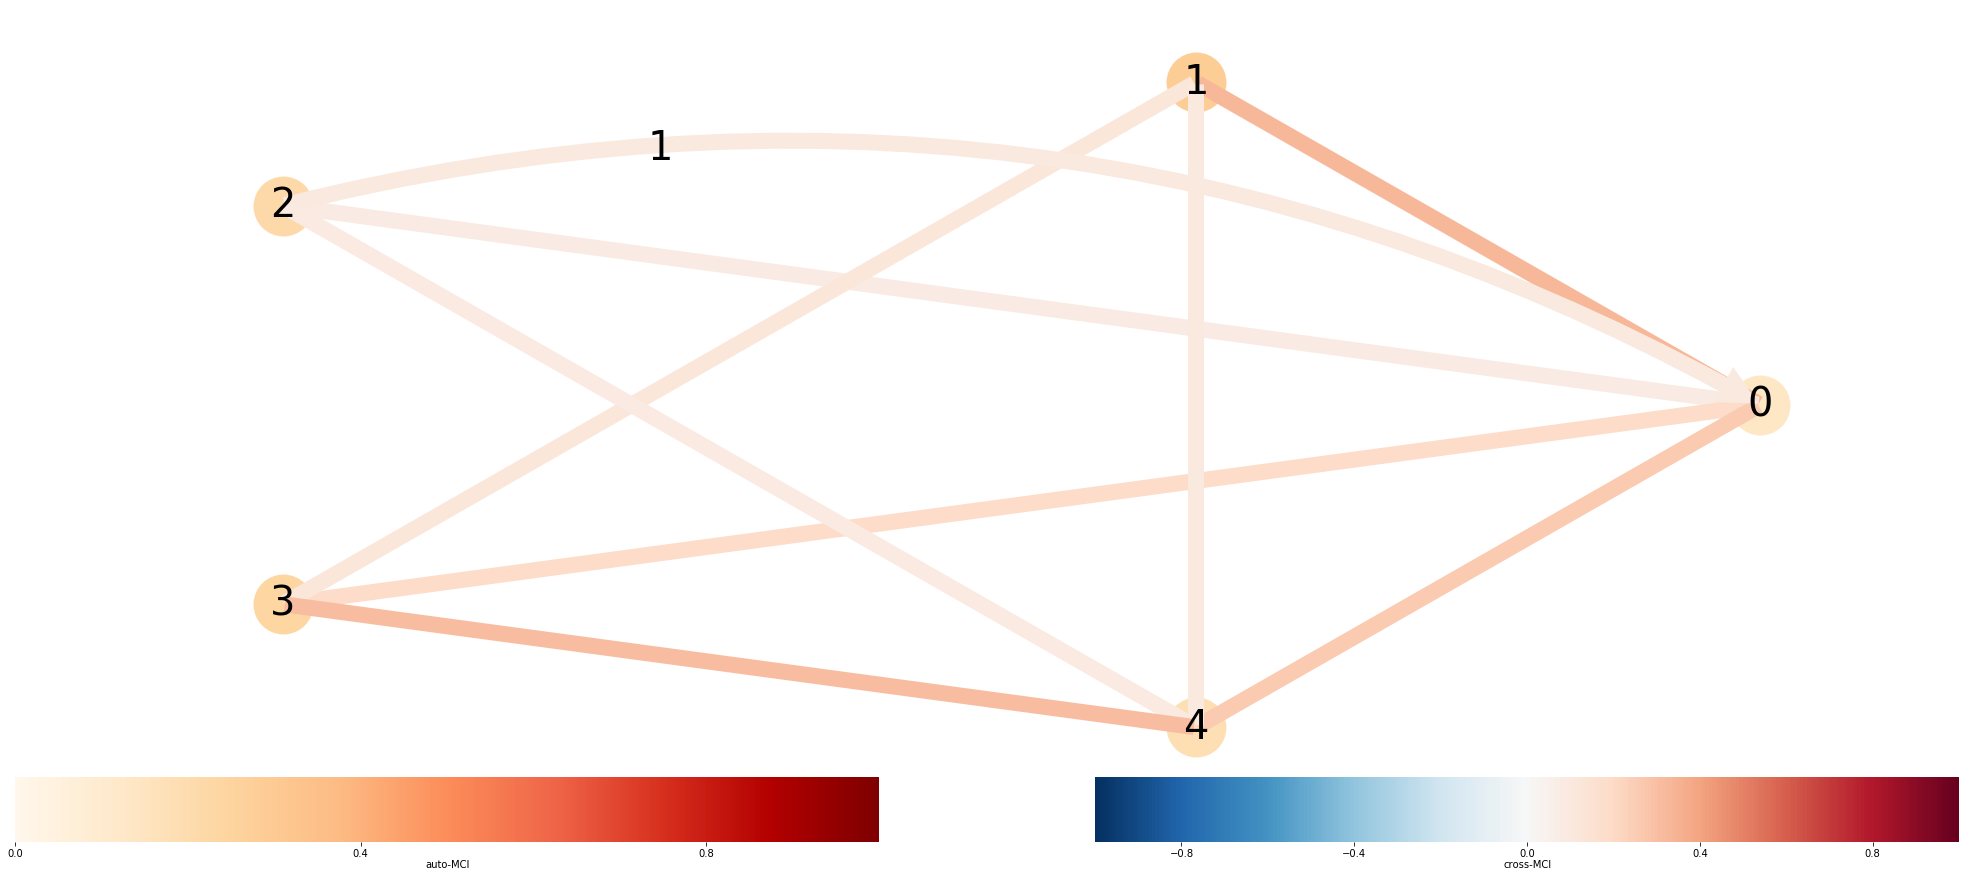

In [20]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.05)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 80
    )

# Adding SST

In [22]:
sst = Data('sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()

result_sst = pf.deseasonalize(np.array(result_sst))
data_sst = pd.DataFrame(result_sst)

#result_sst = pf.deseasonalize(np.array(result_sst))
n_components_sst = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_sst)

pca = PCA(n_components=n_components_sst)
pca_model = pca.fit(scaled_data)

#pca_data = pca_model.transform(data)

#Matrix = pd.DataFrame(pca_model.components_)
#Matrix1 = np.transpose(Matrix)

Matrix = np.transpose(pca_model.components_)
#Matrix1 = Matrix1/Matrix1.sum(axis=0)
#Matrix = Matrix/Matrix.sum(axis=0)
#Matrix, R, indx = orthomax(Matrix)


loading_sst = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_sst = pd.DataFrame(Matrix)
#loading = pd.DataFrame(Matrix)
#loading = loading.abs()
#loading = loading/loading.sum()

clusters = loading_sst.idxmax(axis=1)
df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clusters.values.tolist()})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

# Adding SST (Clustering)

In [42]:
n_components_sst = 20

sst = Data('sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()

result_sst = pf.deseasonalize(np.array(result_sst))

#temp = pf.deseasonalize(np.transpose(result))
temp = np.array(result_sst)
#temp = pf.deseasonalize(result)
clustering = AgglomerativeClustering(n_clusters=n_components_sst).fit(np.transpose(temp))

df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clustering.labels_})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

cluster_sst = []
for i in range(n_components_sst):
    Idx = np.where((df_sst.clusters == i).values)[0]
    r = result_sst[:,Idx]
    #r = pf.deseasonalize(np.array(r))
    data = pd.DataFrame(r)
    scale = StandardScaler()
    scaled_data = scale.fit_transform(data)
    pca = PCA(n_components=n_components_sst)
    pca_model = pca.fit(scaled_data)
    pca_data = pca_model.transform(data)
    cluster_sst.append(pca_data[:,0])

df_cluster_sst = pd.DataFrame(np.transpose(np.matrix(cluster_sst)))

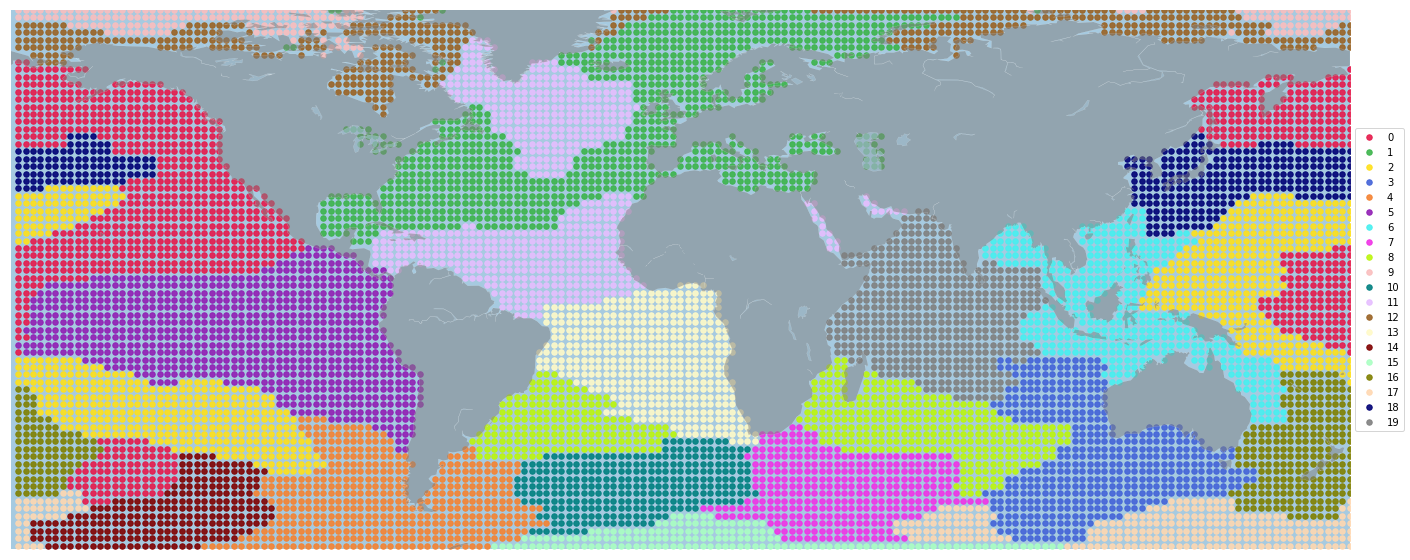

In [43]:
df_list = []
for j in range(n_components_sst):
    df_list.append(pd.DataFrame(columns=df_sst.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
'#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
#colors = pf.random_color(n_components_sst)

for i in range(n_components_sst):
    values = df_sst["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df_sst.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=30, label = i, c = colors[i])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
#plt.legend()
plt.show()

# Adding Air pressure

In [23]:
pres = Data('pres.mon.mean.nc','pres',temporal_limits, missing_value= -9.96921e+36)

result_pres = pres.get_data()
lon_pres_list = pres.get_lon_list()
lat_pres_list = pres.get_lat_list()
lon_pres = pres.get_lon()
lat_pres = pres.get_lat()

result_pres = pf.deseasonalize(np.array(result_pres))
data_pres = pd.DataFrame(result_pres)

#result_pres = pf.deseasonalize(np.array(result_pres))
n_components_pres = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_pres)

pca = PCA(n_components=n_components_pres)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


loading_pres = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_pres = pd.DataFrame(Matrix)

clusters = loading_pres.idxmax(axis=1)
df_pres = pd.DataFrame({"lons":lon_pres_list,"lats":lat_pres_list,"clusters":clusters.values.tolist()})

lon_temp = df_pres["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_pres["lons"].vlues = lon_temp

# Adding Air pressure (Clustering)

In [27]:
n_components_pres = 10

pres = Data('pres.mon.mean.nc','pres',temporal_limits, missing_value= -9.96921e+36)

result_pres = pres.get_data()
lon_pres_list = pres.get_lon_list()
lat_pres_list = pres.get_lat_list()
lon_pres = pres.get_lon()
lat_pres = pres.get_lat()

result_pres = pf.deseasonalize(np.array(result_pres))

#temp = pf.deseasonalize(np.transpose(result))
temp = np.array(result_pres)
#temp = pf.deseasonalize(result)
clustering = AgglomerativeClustering(n_clusters=n_components_pres).fit(np.transpose(temp))

df_pres = pd.DataFrame({"lons":lon_pres_list,"lats":lat_pres_list,"clusters":clustering.labels_})

lon_temp = df_pres["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_pres["lons"].vlues = lon_temp

cluster_pres = []
for i in range(n_components_pres):
    Idx = np.where((df_pres.clusters == i).values)[0]
    r = result_pres[:,Idx]
    #r = pf.deseasonalize(np.array(r))
    data = pd.DataFrame(r)
    scale = StandardScaler()
    scaled_data = scale.fit_transform(data)
    pca = PCA(n_components=n_components_pres)
    pca_model = pca.fit(scaled_data)
    pca_data = pca_model.transform(data)
    cluster_pres.append(pca_data[:,0])

df_cluster_pres = pd.DataFrame(np.transpose(np.matrix(cluster_pres)))

# Adding Air temperature (PCA)

In [24]:
air = Data('air.mon.mean.nc','air',temporal_limits, missing_value= -9.96921e+36)

result_air = air.get_data()
lon_air_list = air.get_lon_list()
lat_air_list = air.get_lat_list()
lon_air = air.get_lon()
lat_air = air.get_lat()

result_air = pf.deseasonalize(np.array(result_air))
data_air = pd.DataFrame(result_air)

#result_air = pf.deseasonalize(np.array(result_air))
n_components_air = 10


scale = StandardScaler()
scaled_data = scale.fit_transform(data_air)

pca = PCA(n_components=n_components_air)
pca_model = pca.fit(scaled_data)

Matrix = np.transpose(pca_model.components_)
#Matrix = Matrix/Matrix.sum(axis=0)


loading_air = pd.DataFrame(pf.varimax(Matrix, q=1000))
#loading_air = pd.DataFrame(Matrix)

clusters = loading_air.idxmax(axis=1)
df_air = pd.DataFrame({"lons":lon_air_list,"lats":lat_air_list,"clusters":clusters.values.tolist()})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"].vlues = lon_temp

# Adding Air temperature (Clustering)

In [20]:
n_components_air = 10

air = Data('air.mon.mean.nc','air',temporal_limits, missing_value= -9.96921e+36)

result_air = air.get_data()
lon_air_list = air.get_lon_list()
lat_air_list = air.get_lat_list()
lon_air = air.get_lon()
lat_air = air.get_lat()

result_air = pf.deseasonalize(np.array(result_air))

#temp = pf.deseasonalize(np.transpose(result))
temp = np.array(result_air)
#temp = pf.deseasonalize(result)
clustering = AgglomerativeClustering(n_clusters=n_components_air).fit(np.transpose(temp))

df_air = pd.DataFrame({"lons":lon_air_list,"lats":lat_air_list,"clusters":clustering.labels_})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"].vlues = lon_temp

In [25]:
cluster_air = []
for i in range(n_components_air):
    Idx = np.where((df_air.clusters == i).values)[0]
    r = result_air[:,Idx]
    #r = pf.deseasonalize(np.array(r))
    data = pd.DataFrame(r)
    scale = StandardScaler()
    scaled_data = scale.fit_transform(data)
    pca = PCA(n_components=n_components_air)
    pca_model = pca.fit(scaled_data)
    pca_data = pca_model.transform(data)
    cluster_air.append(pca_data[:,0])

df_cluster_air = pd.DataFrame(np.transpose(np.matrix(cluster_air)))

# Discovery of Causality links

In [32]:
pres_name  = []
for i in range(n_components_pres):
    pres_name.append("Pres_%d"%i)

air_name  = []
for i in range(n_components_air):
    air_name.append("Air_%d"%i)

sst_name  = []
for i in range(n_components_sst):
    sst_name.append("SST_%d"%i)

precip_name  = []
for i in range(n_components):
    precip_name.append("Precipitation_%d"%i)

var_names = precip_name + sst_name + air_name + pres_name

result_precip = np.matrix(df_cluster)
#result_sst = result_sst.dot(loading_sst)
#result_air = result_air.dot(loading_air)
#result_pres = result_pres.dot(loading_pres)

result_air = np.matrix(df_cluster_air)
result_sst = np.matrix(df_cluster_sst)
result_pres = np.matrix(df_cluster_pres)


result = np.concatenate((result_precip, result_sst, result_air, result_pres), axis=1)
result = np.matrix(result)

In [33]:
dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [34]:
results = pcmci.run_pcmci(tau_max=2, pc_alpha=None)

In [35]:
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.01)


## Significant links at alpha = 0.01:

    Variable Precipitation_0 has 10 link(s):
        (Precipitation_1 0): pval = 0.00000 | val = 0.313
        (Precipitation_4 0): pval = 0.00000 | val = 0.259
        (Precipitation_3 0): pval = 0.00000 | val = 0.207
        (SST_8 0): pval = 0.00000 | val = 0.198
        (Pres_6 0): pval = 0.00001 | val = -0.154
        (SST_6 0): pval = 0.00058 | val = 0.122
        (Pres_3 0): pval = 0.00162 | val = -0.112
        (Precipitation_2 0): pval = 0.00272 | val = 0.106
        (Precipitation_0 -1): pval = 0.00322 | val = 0.105
        (Precipitation_2 -1): pval = 0.00354 | val = 0.103

    Variable Precipitation_1 has 10 link(s):
        (Precipitation_0 0): pval = 0.00000 | val = 0.313
        (SST_8 0): pval = 0.00000 | val = 0.297
        (Precipitation_1 -1): pval = 0.00000 | val = 0.295
        (Pres_8 0): pval = 0.00004 | val = 0.147
        (Pres_9 -2): pval = 0.00062 | val = -0.122
        (Precipitation_3 0): pval = 0.00068 | val = 0.120


(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1dfa215f98>)

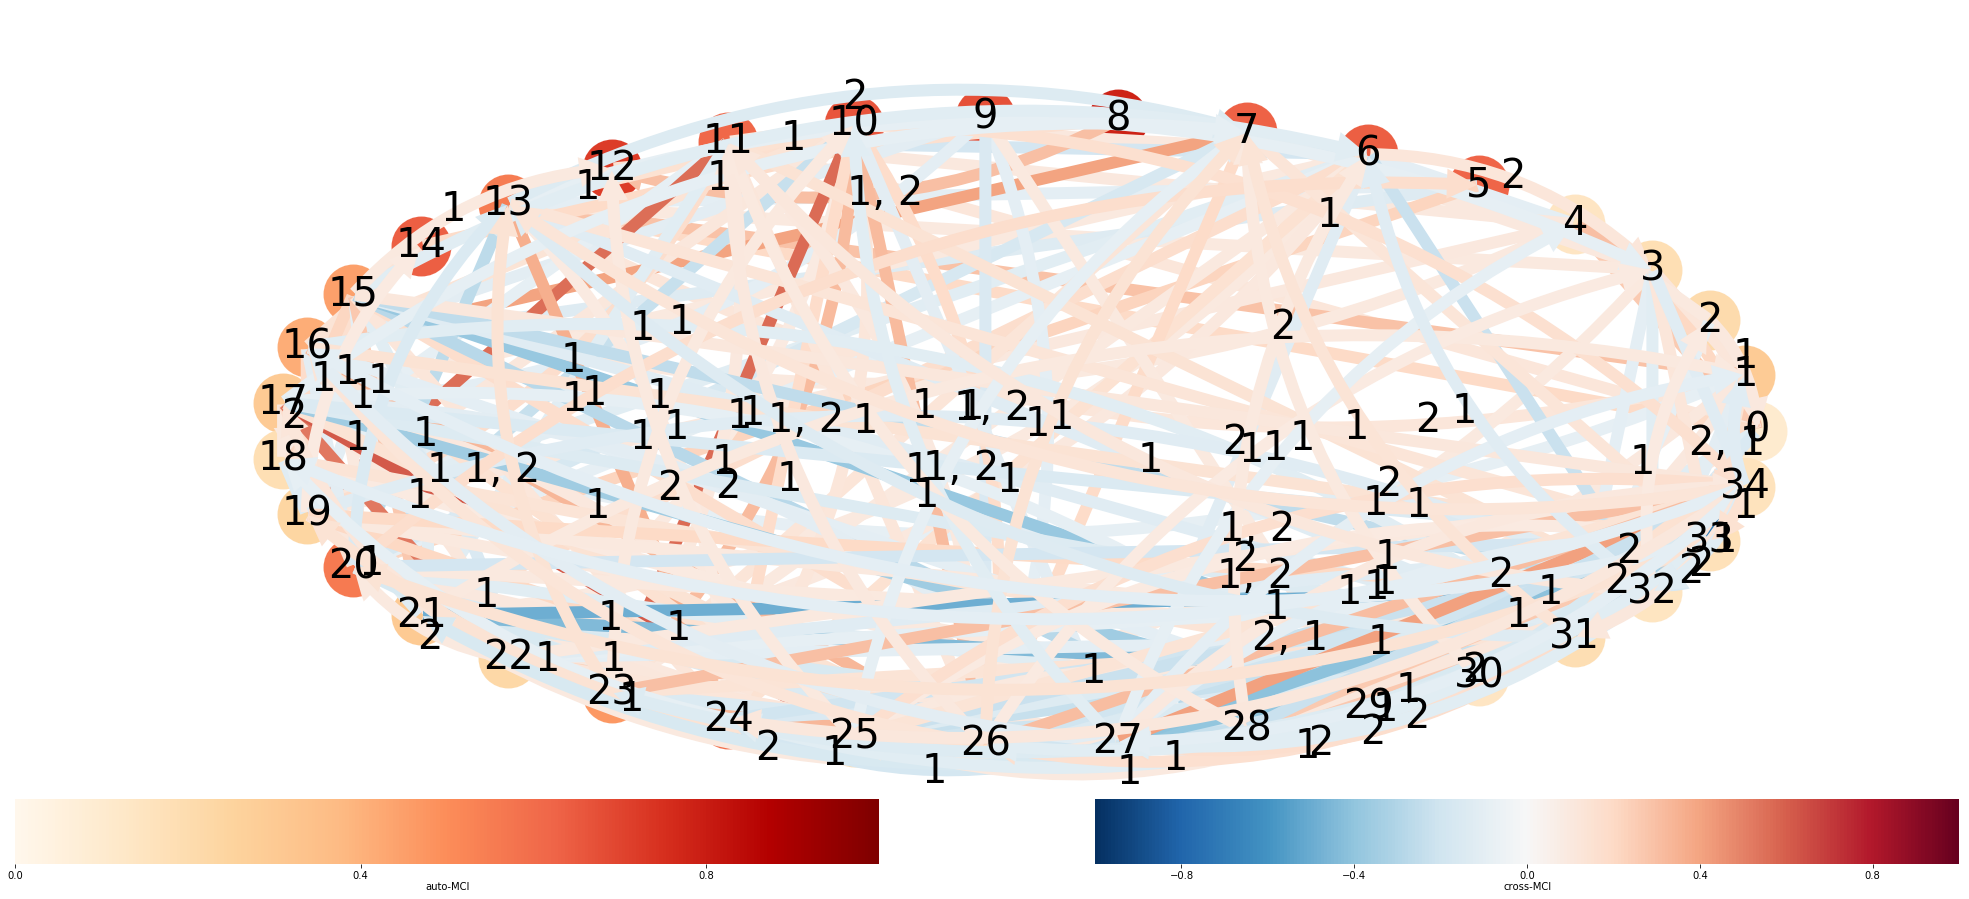

In [37]:
link_matrix = pcmci.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )

In [30]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable Precipitation_0 has 10 link(s):
        (Precipitation_1 0): pval = 0.00000 | qval = 0.00000 | val = 0.322
        (Precipitation_4 0): pval = 0.00000 | qval = 0.00000 | val = 0.258
        (Precipitation_3 0): pval = 0.00000 | qval = 0.00000 | val = 0.214
        (Pres_9 0): pval = 0.00001 | qval = 0.00001 | val = -0.154
        (Pres_5 0): pval = 0.00008 | qval = 0.00008 | val = -0.140
        (SST_1 0): pval = 0.00017 | qval = 0.00017 | val = -0.133
        (Pres_4 0): pval = 0.00043 | qval = 0.00043 | val = 0.125
        (Pres_2 0): pval = 0.00089 | qval = 0.00089 | val = -0.117
        (Precipitation_2 0): pval = 0.00162 | qval = 0.00162 | val = 0.111
        (Pres_6 0): pval = 0.00570 | qval = 0.00570 | val = 0.098

    Variable Precipitation_1 has 13 link(s):
        (Precipitation_0 0): pval = 0.00000 | qval = 0.00000 | val = 0.322
        (Precipitation_1 -1): pval = 0.00000 | qval = 0.00000 | val = 0.289
        (Pres_2 0):

(<Figure size 2160x1080 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ef2377240>)

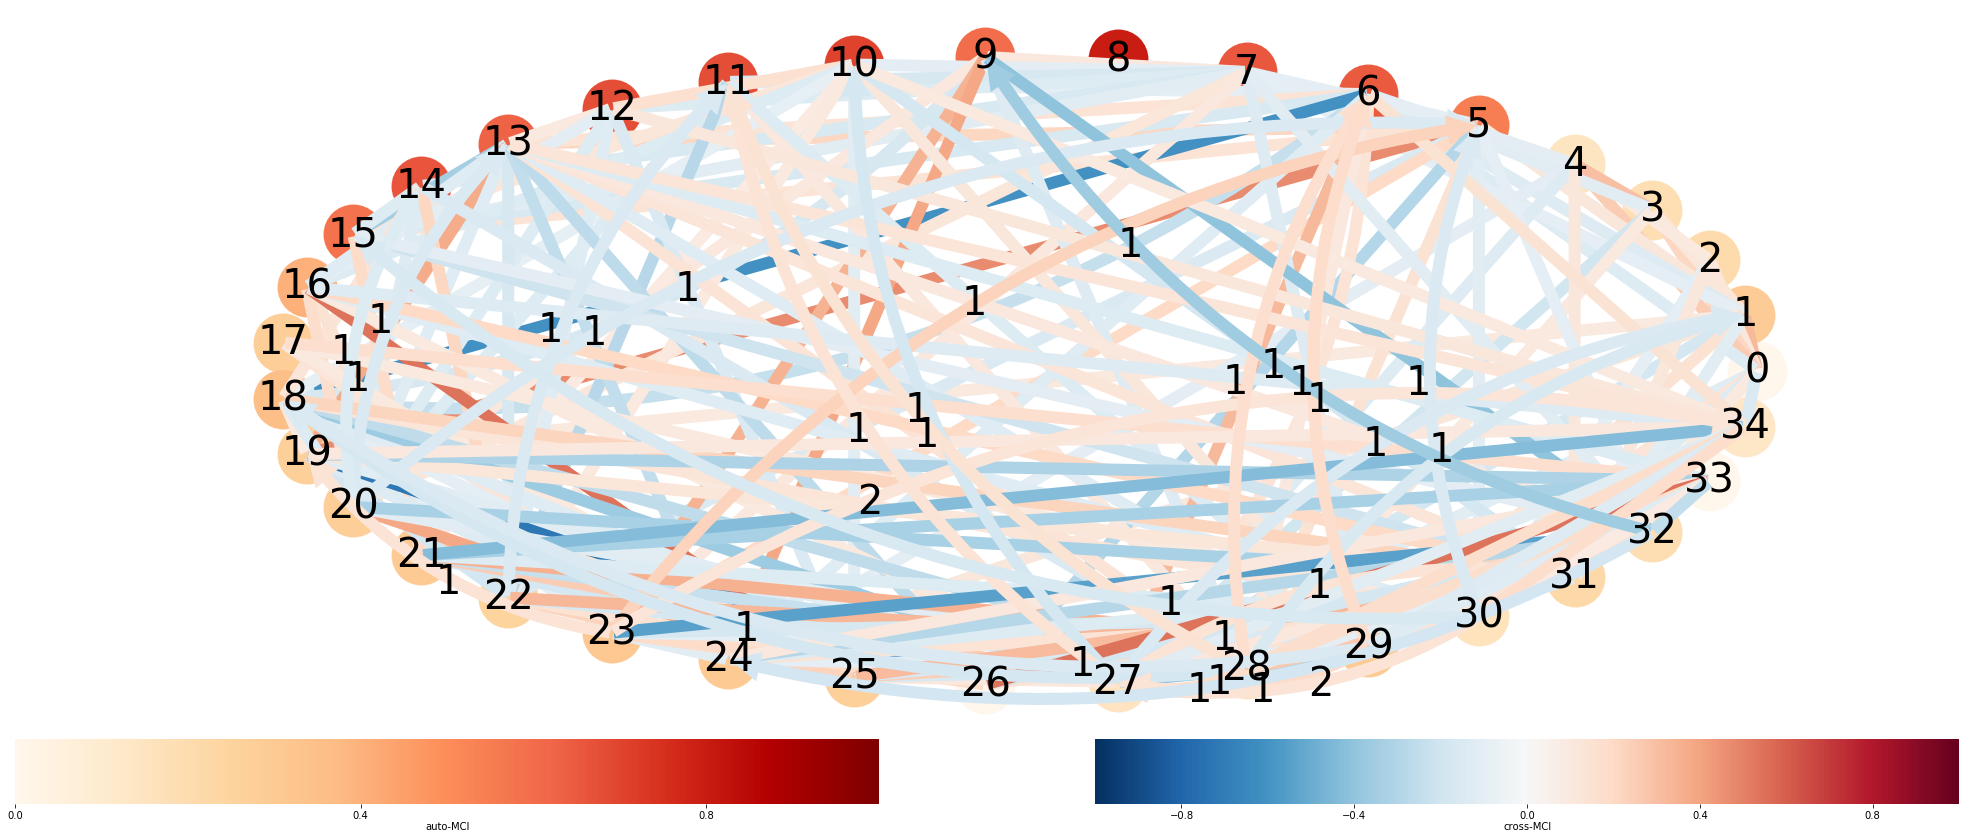

In [31]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',figsize=(30,15),
    node_label_size=40,
    link_label_fontsize = 40,
    node_size = 60,
    arrow_linewidth = 60
    )